In [1]:
import time

In [2]:
time.gmtime(time.time()).tm_hour

7

In [5]:
import datetime
current_datetime = datetime.datetime.now()
current_year = current_datetime.year
current_month = current_datetime.month
current_hour = current_datetime.hour

In [6]:
current_hour

15

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 12

In [5]:
housing = pd.read_csv("E://study//python//handson-ml-master//datasets//housing/housing.csv")

In [6]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [18]:
corr_matrix = housing.corr()

In [19]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [38]:
cols = corr_matrix.nlargest(10, "median_house_value")["median_house_value"].index
corr_matrix[cols]

,median_house_value,median_income,total_rooms,housing_median_age,households,total_bedrooms,population,longitude,latitude
longitude,-0.045967,-0.015176,0.044568,-0.108197,0.055310,0.069608,0.099773,1.000000,-0.924664
latitude,-0.144160,-0.079809,-0.036100,0.011173,-0.071035,-0.066983,-0.108785,-0.924664,1.000000
housing_median_age,0.105623,-0.119034,-0.361262,1.000000,-0.302916,-0.320451,-0.296244,-0.108197,0.011173
total_rooms,0.134153,0.198050,1.000000,-0.361262,0.918484,0.930380,0.857126,0.044568,-0.036100
total_bedrooms,0.049686,-0.007723,0.930380,-0.320451,0.979728,1.000000,0.877747,0.069608,-0.066983
population,-0.024650,0.004834,0.857126,-0.296244,0.907222,0.877747,1.000000,0.099773,-0.108785
households,0.065843,0.013033,0.918484,-0.302916,1.000000,0.979728,0.907222,0.055310,-0.071035
median_income,0.688075,1.000000,0.198050,-0.119034,0.013033,-0.007723,0.004834,-0.015176,-0.079809
median_house_value,1.000000,0.688075,0.134153,0.105623,0.065843,0.049686,-0.024650,-0.045967,-0.144160


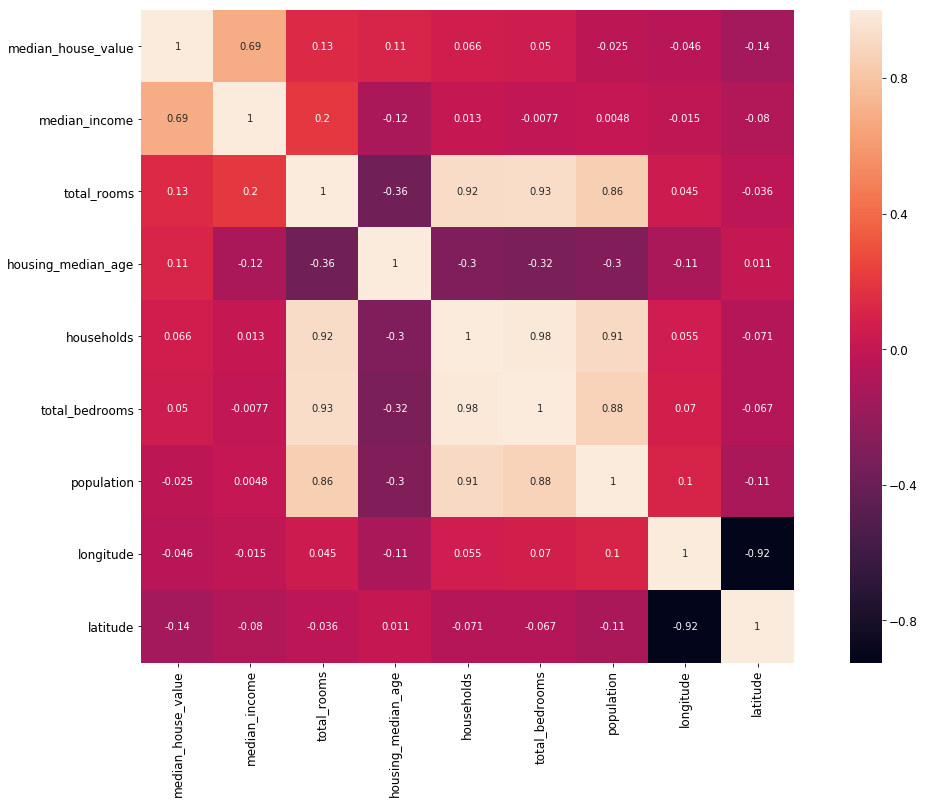

In [41]:
plt.subplots(figsize=(20, 12))
cm = corr_matrix.nlargest(10, "median_house_value")
sns.heatmap(cm[cm["median_house_value"].index], annot=True, square=True)

In [28]:
corr_matrix.nlargest(10,"median_house_value")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160


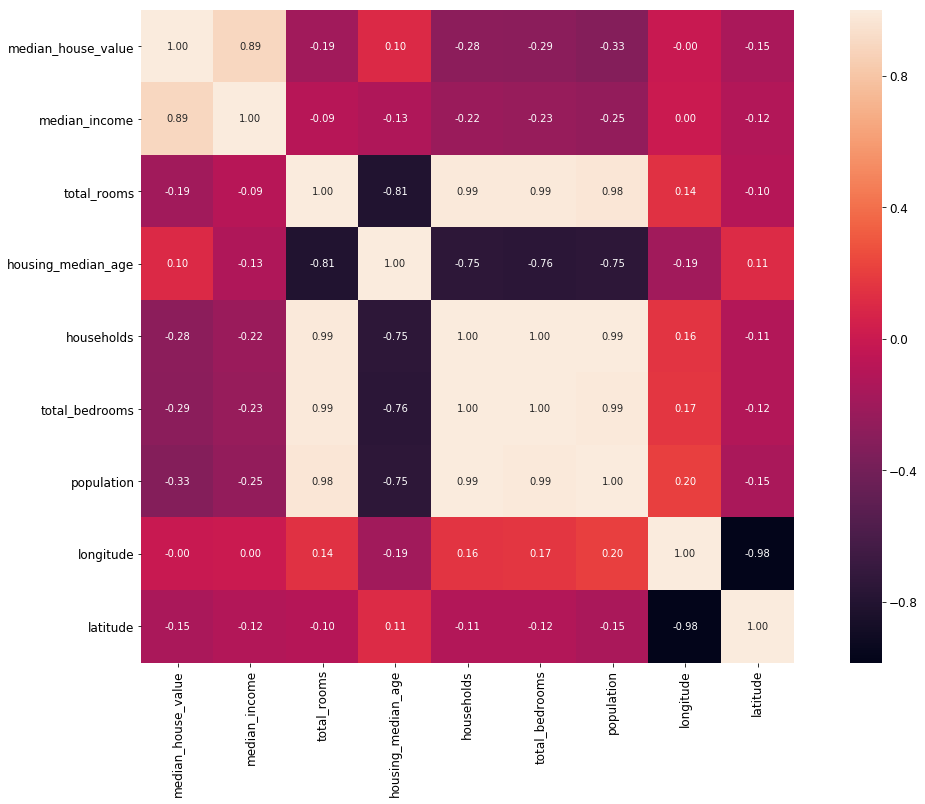

In [30]:
cols = corr_matrix.nlargest(10, "median_house_value")["median_house_value"].index
cm = np.corrcoef(corr_matrix[cols].values.T)

plt.figure(figsize=(20, 12))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", xticklabels=cols.values, yticklabels=cols.values)

array([[ 1.00000000e+00, -9.84176657e-01, -1.86699423e-01,
         1.40730994e-01,  1.65913228e-01,  2.04567139e-01,
         1.60745182e-01,  9.42905495e-04, -3.71125153e-03],
       [-9.84176657e-01,  1.00000000e+00,  1.13555062e-01,
        -1.00534509e-01, -1.15734809e-01, -1.51289593e-01,
        -1.13872756e-01, -1.15833475e-01, -1.51589427e-01],
       [-1.86699423e-01,  1.13555062e-01,  1.00000000e+00,
        -8.06298021e-01, -7.55412443e-01, -7.45965092e-01,
        -7.49883377e-01, -1.25554826e-01,  1.04792334e-01],
       [ 1.40730994e-01, -1.00534509e-01, -8.06298021e-01,
         1.00000000e+00,  9.86972564e-01,  9.76312389e-01,
         9.87362185e-01, -9.08860073e-02, -1.86883952e-01],
       [ 1.65913228e-01, -1.15734809e-01, -7.55412443e-01,
         9.86972564e-01,  1.00000000e+00,  9.90442711e-01,
         9.99424383e-01, -2.33260464e-01, -2.90688952e-01],
       [ 2.04567139e-01, -1.51289593e-01, -7.45965092e-01,
         9.76312389e-01,  9.90442711e-01,  1.000000